In [1]:
import pandas as pd                 # Importing pandas library for data manipulation and analysis
import numpy as np                  # Importing numpy library for numerical operations
import re                           # Importing re library for regular expression operations
import seaborn as sns               # Importing seaborn library for data visualization
import matplotlib.pyplot as plt     # Importing matplotlib library for data visualization
import nltk                         # Importing nltk library for natural language processing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer   # Importing WordNetLemmatizer and PorterStemmer classes for text preprocessing
from sklearn.preprocessing import LabelEncoder          # Importing LabelEncoder class for encoding categorical variables
from sklearn.feature_extraction.text import CountVectorizer   # Importing CountVectorizer class for text preprocessing
from sklearn.model_selection import train_test_split    # Importing train_test_split function for splitting data into train and test sets
from sklearn.naive_bayes import MultinomialNB            # Importing MultinomialNB class for training a Naive Bayes model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   # Importing evaluation metrics for measuring the model's performance

In [2]:
data = pd.read_csv("Language Detection.csv")  # Reading the dataset into a pandas dataframe
data.head()                                   # Displaying the first five rows of the dataset

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data["Language"].value_counts()    # Counting the number of observations in each language category

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
X = data["Text"]                              # Assigning the 'Text' column as input features
y = data["Language"]                          # Assigning the 'Language' column as target variable

In [5]:
le = LabelEncoder()                           # Creating an instance of LabelEncoder
y = le.fit_transform(y)                       # Encoding the target variable as integers

In [6]:
data_list = []  
lemmatizer = WordNetLemmatizer()      # Creating an instance of WordNetLemmatizer
stemmer = PorterStemmer()                     # Creating an instance of PorterStemmer
for text in X:
    text = re.sub(r'[^\w\s]', '', text)      # Removing punctuations and special characters from the text
    text = re.sub(r'\d+', '', text)           # Removing digits from the text
    text = text.lower()                       # Converting the text to lowercase
    text = nltk.word_tokenize(text)       # Tokenizing the text into words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]   # Lemmatizing the tokens
    text = ' '.join(lemmatized_tokens)        # Joining the lemmatized tokens to form a text string
    data_list.append(text)                    # Appending the preprocessed text to a list



In [7]:
cv = CountVectorizer()                        # Creating an instance of CountVectorizer
X = cv.fit_transform(data_list)               # Transforming the preprocessed text into a bag of words model
X.shape                                      # Displaying the shape of the transformed data

(10337, 45290)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  # Splitting the data into training and testing sets


In [9]:
model = MultinomialNB()                       # Initialize a Multinomial Naive Bayes classifier
model.fit(x_train, y_train)                   # Training the model on the training set

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)    #Predict the labels of the test data using the trained classifier.

In [11]:
ac = accuracy_score(y_test, y_pred)     #Calculate the accuracy of the model by comparing the predicted labels with the actual labels
cm = confusion_matrix(y_test, y_pred)    #Generate a confusion matrix to visualize the performance of the model
cr = classification_report(y_test, y_pred, target_names=le.classes_)       #Generate a classification report to summarize the performance of the model
print("Accuracy is :",ac)      #Print the accuracy of the model

Accuracy is : 0.9816247582205029


In [12]:
print("Confusion Matrix: \n", cm)     #Print the confusion matrix


Confusion Matrix: 
 [[ 93   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  88   0   1   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0 105   3   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 288   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 189   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   0  78   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0  91   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 139   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0  85   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0 109   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0 161   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0 140   0   0   0   0]
 [  0   0   0   2   0   0   0   0   1   0   0   0   0 158

In [13]:
print("Classification Report: \n", cr)   #Print the classification report

Classification Report: 
               precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99        95
      Danish       1.00      0.96      0.98        92
       Dutch       0.99      0.96      0.98       109
     English       0.91      1.00      0.95       288
      French       0.99      1.00      0.99       189
      German       1.00      0.96      0.98        81
       Greek       1.00      0.99      0.99        92
       Hindi       1.00      1.00      1.00        14
     Italian       0.99      1.00      1.00       139
     Kannada       1.00      0.99      0.99        86
   Malayalam       1.00      0.97      0.99       112
  Portugeese       1.00      0.99      1.00       162
     Russian       1.00      0.97      0.99       144
     Spanish       0.99      0.98      0.99       161
    Sweedish       0.98      0.98      0.98       123
       Tamil       1.00      0.95      0.97        93
     Turkish       1.00      0.94      0.97        88

 

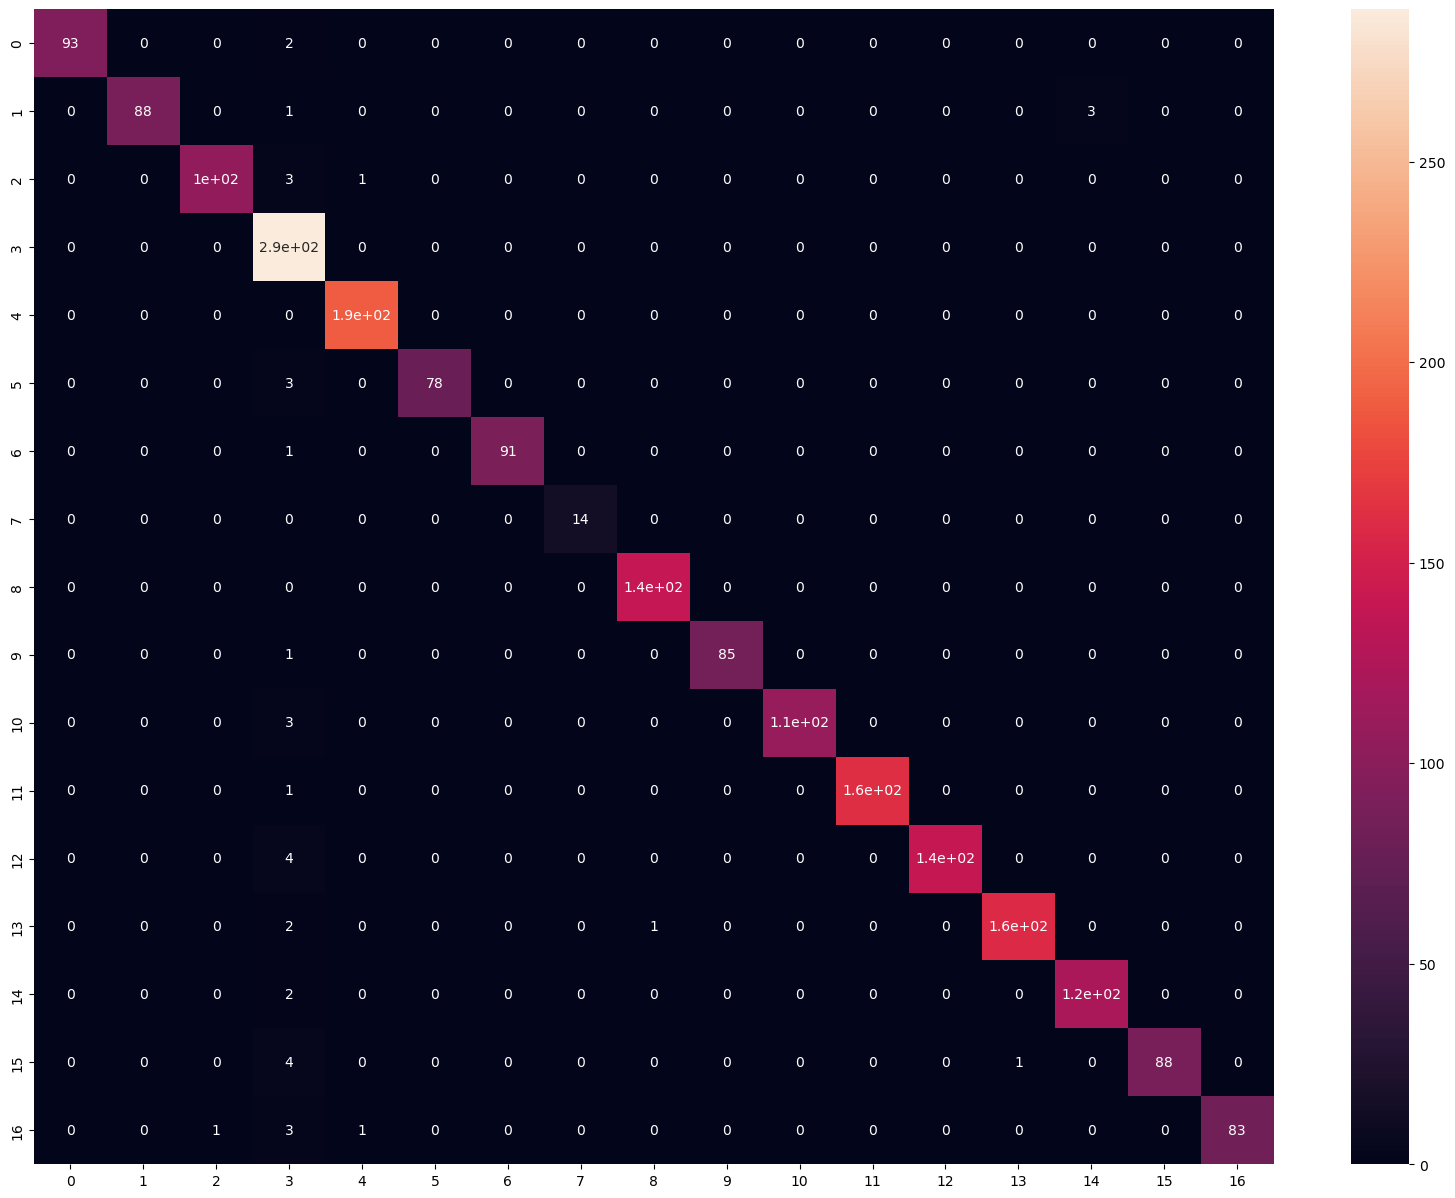

In [14]:
plt.figure(figsize=(20,15))   #Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True)
plt.show()

In [15]:
def predict(text):
    x = cv.transform([text]).toarray()  # Convert the text input into a numerical format using CountVectorizer and transform it into a numpy array
    lang = model.predict(x)       # Predict the language of the input text using the trained model
    lang = le.inverse_transform(lang)   # Inverse transform the predicted label to get the actual language name
    print("The language is:", lang[0])   # Print the predicted language name
     

In [16]:
predict("صباح الخير ")   #Use the predict function to predict the language of a given text
predict("hello")
predict("hola")

The language is: Arabic
The language is: English
The language is: Spanish


In [17]:
predict("amico")

The language is: Italian
